In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

# **Line PLot for the Demand**

In [2]:
demand = pd.read_csv("demand.csv")

In [15]:
demand

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,30,0,0
1,2,high,8160,0,0,0,61,0,0
2,3,high,11016,0,0,0,95,0,0
3,4,high,13953,0,0,0,130,0,0
4,5,high,19186,0,0,0,168,0,0
...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,763,4629
500,165,low,0,0,255443,785981,0,733,4767
501,166,low,0,0,268216,825280,0,700,4908
502,167,low,0,0,281626,866544,0,666,5055


In [ ]:
demand.columns

Index(['time_step', 'latency_sensitivity', 'CPU.S1', 'CPU.S2', 'CPU.S3',
       'CPU.S4', 'GPU.S1', 'GPU.S2', 'GPU.S3'],
      dtype='object')

In [63]:
demand_subset = demand[["time_step","latency_sensitivity","CPU.S1", "CPU.S2","CPU.S3", "CPU.S4", "GPU.S1", "GPU.S2", "GPU.S3"]]

In [64]:
demand_subset

,time_step,latency_sensitivity,CPU.S1,CPU.S2,CPU.S3,CPU.S4,GPU.S1,GPU.S2,GPU.S3
0,1,high,4000,0,0,0,30,0,0
1,2,high,8160,0,0,0,61,0,0
2,3,high,11016,0,0,0,95,0,0
3,4,high,13953,0,0,0,130,0,0
4,5,high,19186,0,0,0,168,0,0
...,...,...,...,...,...,...,...,...,...
499,164,low,0,0,243279,748553,0,763,4629
500,165,low,0,0,255443,785981,0,733,4767
501,166,low,0,0,268216,825280,0,700,4908
502,167,low,0,0,281626,866544,0,666,5055


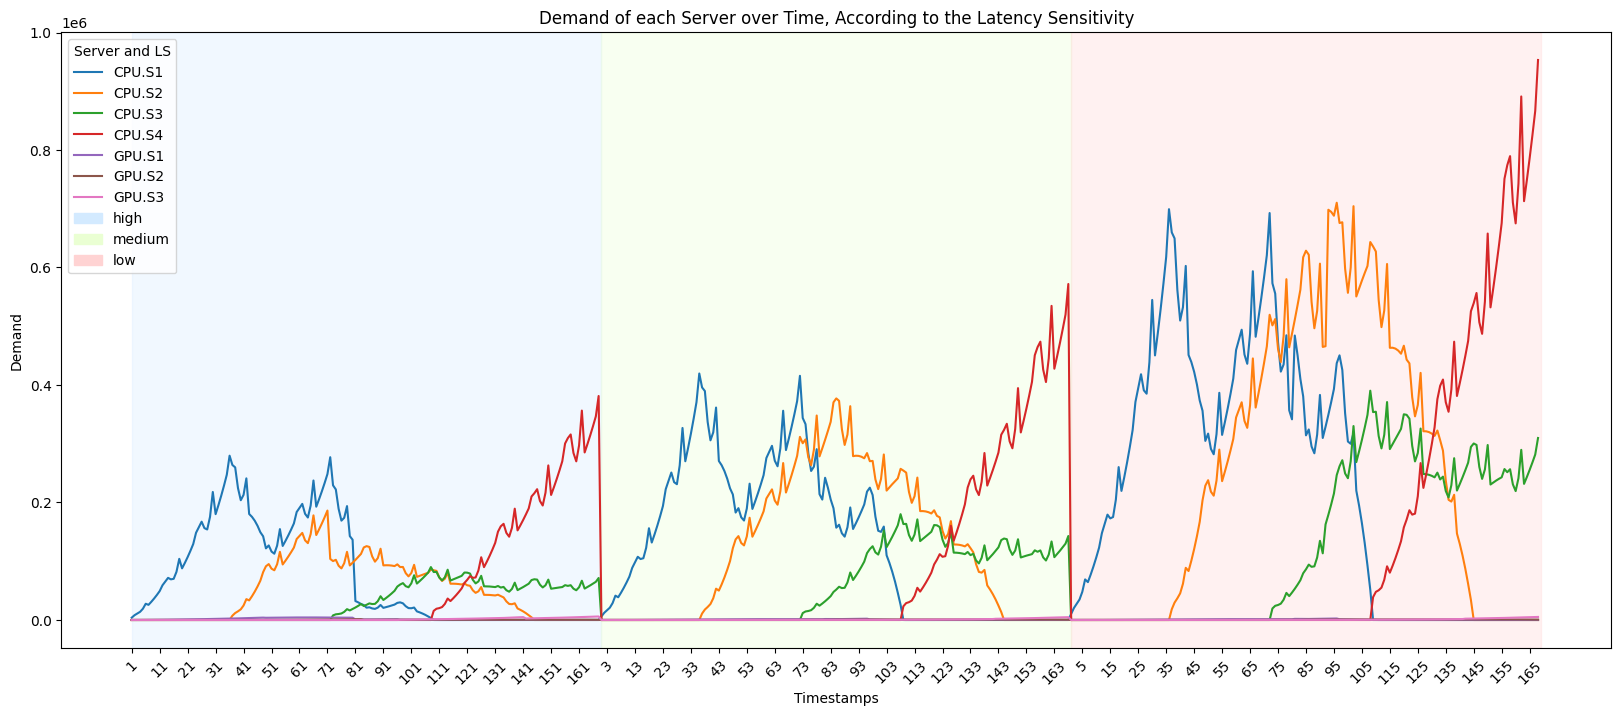

In [67]:
class_boundaries = [0, 168, 336, 504]

background_colors = {"high": '#d3eaff', "medium": '#eaffd3',"low": '#ffd3d3'}


plt.figure(figsize=(20, 8))


for i, color in enumerate(background_colors.values()):
    plt.axvspan(class_boundaries[i], class_boundaries[i+1], color=color, alpha=0.3)
lines = []

for col in demand_subset.columns[2:]:
    line, = plt.plot(range(len(demand_subset)), demand_subset[col], label=col)
    lines.append(line)



plt.xlabel('Timestamps')
plt.ylabel('Demand')
plt.title('Demand of each Server over Time, According to the Latency Sensitivity')
plt.legend()
plt.xticks(list(range(len(demand_subset)))[::10],(list(range(1,169))*3)[::10], rotation = 45)
patches = [mpatches.Patch(color=color, label=f'{i}') for i, color in background_colors.items()]
plt.legend(handles=lines + patches, loc='upper left', title='Server and LS')


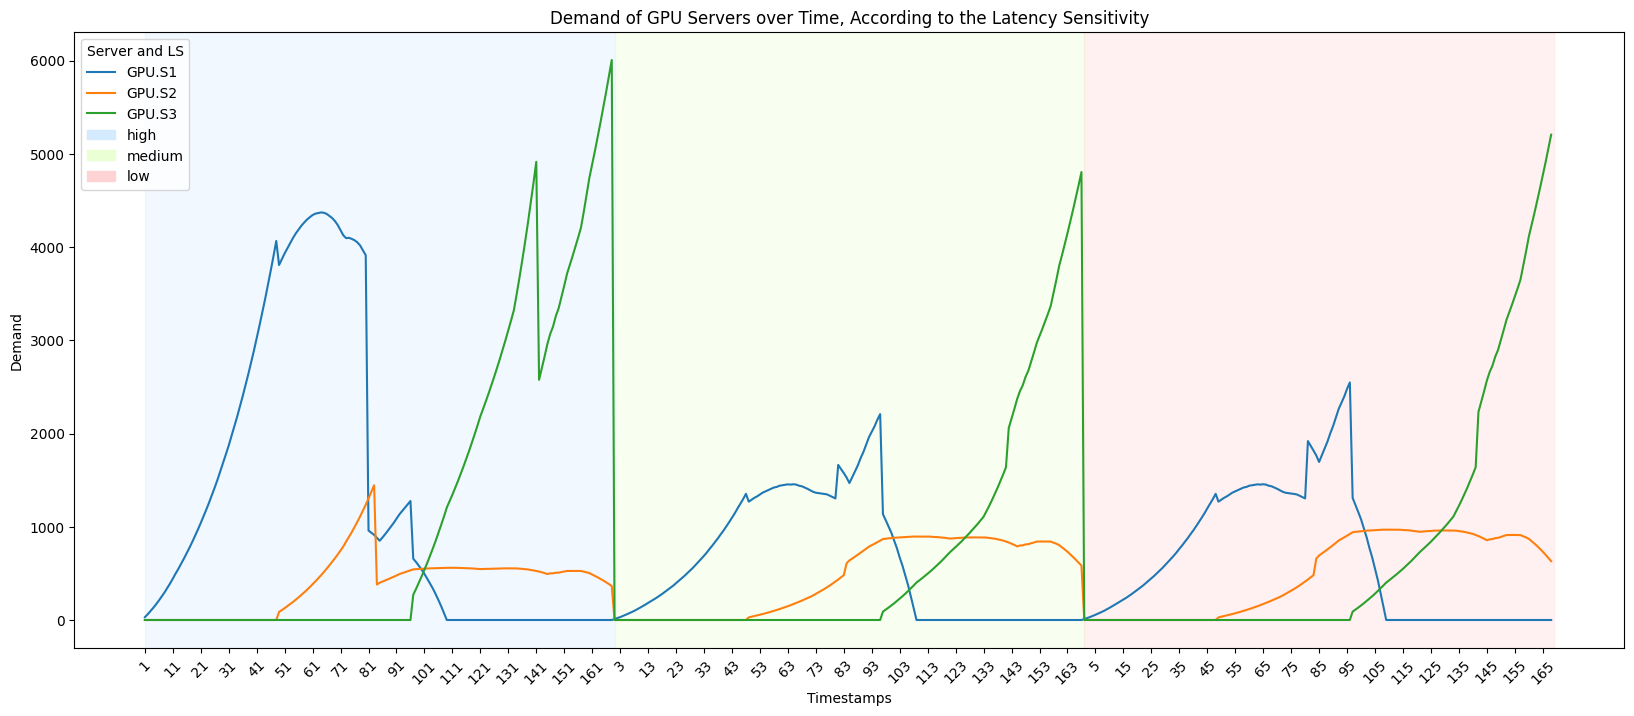

In [72]:
demand_subset2 = demand[["time_step","latency_sensitivity","GPU.S1", "GPU.S2", "GPU.S3"]]

class_boundaries = [0, 168, 336, 504]

background_colors = {"high": '#d3eaff', "medium": '#eaffd3',"low": '#ffd3d3'}


plt.figure(figsize=(20, 8))


for i, color in enumerate(background_colors.values()):
    plt.axvspan(class_boundaries[i], class_boundaries[i+1], color=color, alpha=0.3)
lines = []

for col in demand_subset2.columns[2:]:
    line, = plt.plot(range(len(demand_subset2)), demand_subset2[col], label=col)
    lines.append(line)



plt.xlabel('Timestamps')
plt.ylabel('Demand')
plt.title('Demand of GPU Servers over Time, According to the Latency Sensitivity')
plt.legend()
plt.xticks(list(range(len(demand_subset2)))[::10],(list(range(1,169))*3)[::10], rotation = 45)
patches = [mpatches.Patch(color=color, label=f'{i}') for i, color in background_colors.items()]
plt.legend(handles=lines + patches, loc='upper left', title='Server and LS')



# **Box plot for the demand**

In [77]:
demand_low = demand[demand['latency_sensitivity'] == "low"]
demand_medium = demand[demand['latency_sensitivity'] == "medium"]
demand_high = demand[demand['latency_sensitivity'] == "high"]



Text(0.5, 1.0, 'Box Plot for the Demand of Servers with Low Latency Sensitivity')

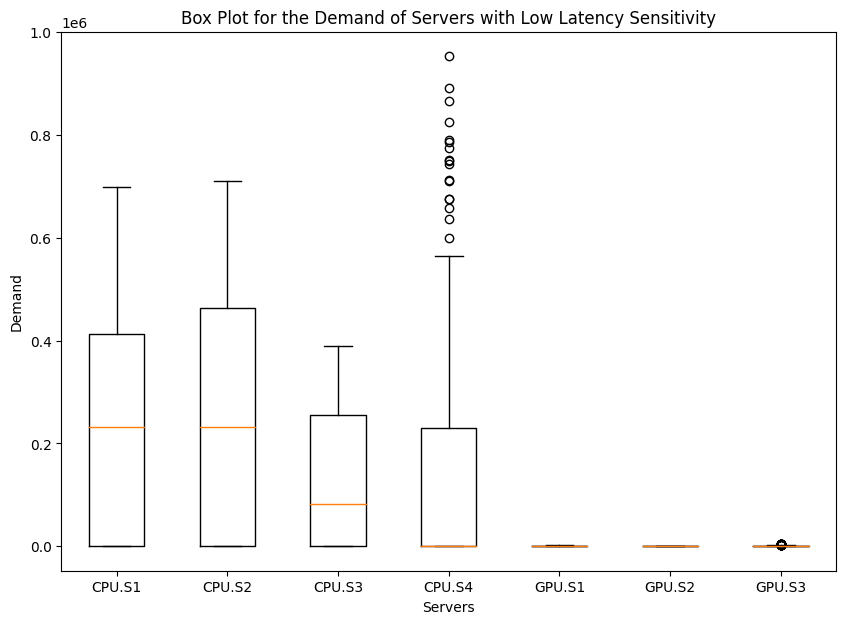

In [80]:
plt.figure(figsize = (10,7))
plt.boxplot([demand_low['CPU.S1'], demand_low['CPU.S2'], demand_low['CPU.S3'], demand_low['CPU.S4'], demand_low['GPU.S1'],demand_low['GPU.S2'], demand_low['GPU.S3']],
            labels = demand_low.columns[2:] )

plt.xlabel("Servers")
plt.ylabel("Demand")
plt.title("Box Plot for the Demand of Servers with Low Latency Sensitivity")

Text(0.5, 1.0, 'Box Plot for the Demand of Servers with Medium Latency Sensitivity')

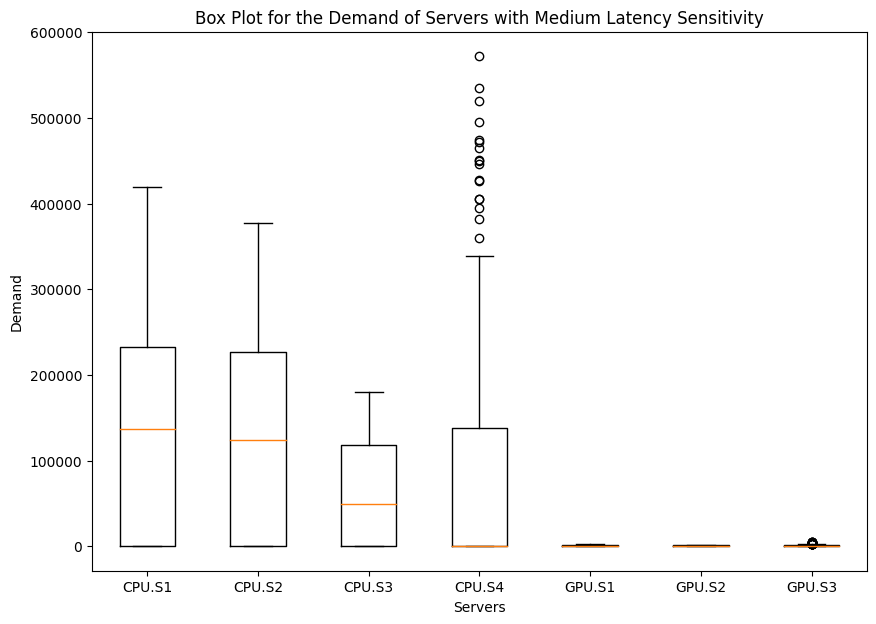

In [81]:
plt.figure(figsize = (10,7))
plt.boxplot([demand_medium['CPU.S1'], demand_medium['CPU.S2'], demand_medium['CPU.S3'], demand_medium['CPU.S4'], demand_medium['GPU.S1'],demand_medium['GPU.S2'], demand_medium['GPU.S3']],
            labels = demand_medium.columns[2:] )

plt.xlabel("Servers")
plt.ylabel("Demand")
plt.title("Box Plot for the Demand of Servers with Medium Latency Sensitivity")

Text(0.5, 1.0, 'Box Plot for the Demand of Servers with High Latency Sensitivity')

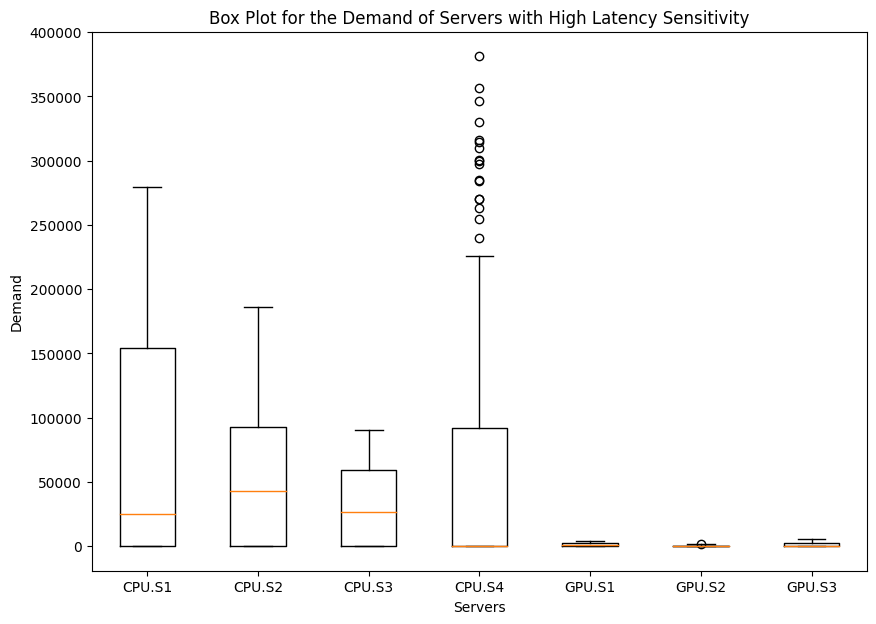

In [82]:
plt.figure(figsize = (10,7))
plt.boxplot([demand_high['CPU.S1'], demand_high['CPU.S2'], demand_high['CPU.S3'], demand_high['CPU.S4'], demand_high['GPU.S1'],demand_high['GPU.S2'], demand_high['GPU.S3']],
            labels = demand_high.columns[2:] )

plt.xlabel("Servers")
plt.ylabel("Demand")
plt.title("Box Plot for the Demand of Servers with High Latency Sensitivity")

# **Box Plot for GPU.S1, GPU.S2 and GPU.S3**

Text(0.5, 1.0, 'Box Plot for the Demand of GPU Servers Overall')

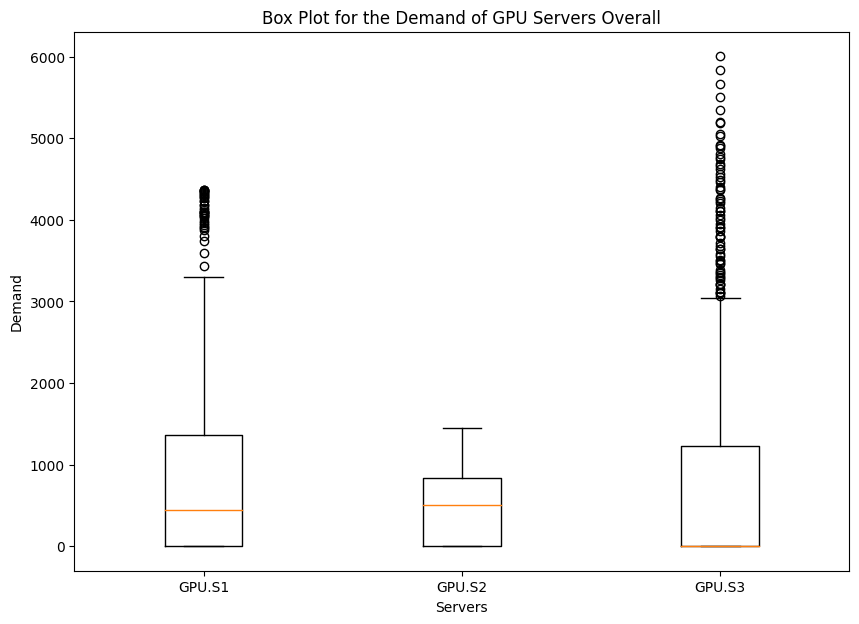

In [83]:
plt.figure(figsize = (10,7))
plt.boxplot([demand['GPU.S1'],demand['GPU.S2'], demand['GPU.S3']],
            labels = demand.columns[6:] )

plt.xlabel("Servers")
plt.ylabel("Demand")
plt.title("Box Plot for the Demand of GPU Servers Overall")

# **Grouping by Latency Sensitivity**

In [84]:
demand_grouped = demand.groupby("latency_sensitivity")

In [85]:
demand_each_type = demand_grouped.median().drop(columns = "time_step")

<Figure size 1000x700 with 0 Axes>

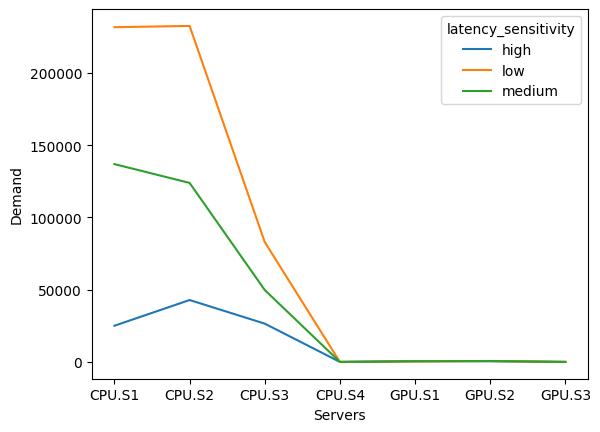

In [88]:
plt.figure(figsize = (10,7))
demand_each_type.T.plot(kind = "line")
plt.xlabel("Servers")
plt.ylabel("Demand")


# **Selling Prices**

In [89]:
selling = pd.read_csv("selling_prices.csv")

In [90]:
selling_CPU = selling.drop(selling[selling["server_generation"] == "GPU.S1"].index)
selling_CPU = selling_CPU.drop(selling_CPU[selling_CPU["server_generation"] == "GPU.S2"].index)
selling_CPU = selling_CPU.drop(selling_CPU[selling_CPU["server_generation"] == "GPU.S3"].index)

In [91]:
selling_CPU

,server_generation,latency_sensitivity,selling_price
0,CPU.S1,low,10.0
1,CPU.S2,low,10.0
2,CPU.S3,low,11.0
3,CPU.S4,low,12.0
7,CPU.S1,medium,15.0
8,CPU.S2,medium,15.0
9,CPU.S3,medium,16.5
10,CPU.S4,medium,18.0
14,CPU.S1,high,25.0
15,CPU.S2,high,25.0


In [92]:
selling_CPU_grouped = selling_CPU.groupby("latency_sensitivity")
selling_CPU_median = selling_CPU_grouped["selling_price"].median()

In [93]:
selling_CPU_median

,selling_price
latency_sensitivity,
high,26.25
low,10.50
medium,15.75


In [94]:
selling_GPU = selling.drop(selling[selling["server_generation"] == "CPU.S1"].index)
selling_GPU = selling_GPU.drop(selling_GPU[selling_GPU["server_generation"] == "CPU.S2"].index)
selling_GPU = selling_GPU.drop(selling_GPU[selling_GPU["server_generation"] == "CPU.S3"].index)
selling_GPU = selling_GPU.drop(selling_GPU[selling_GPU["server_generation"] == "CPU.S4"].index)

In [95]:
selling_GPU_grouped = selling_GPU.groupby("latency_sensitivity")
selling_GPU_median = selling_GPU_grouped["selling_price"].median()

In [96]:
selling_GPU_median

,selling_price
latency_sensitivity,
high,2000.0
low,1600.0
medium,1800.0


In [97]:
categories = ['CPU', 'GPU']
values_category1 = [10.50, 15.75, 26.25]
values_category2 = [1600.00, 1800.00, 2000.00]


labels = ['Low', 'Medium', 'High']


x = np.arange(len(labels))


width = 0.35

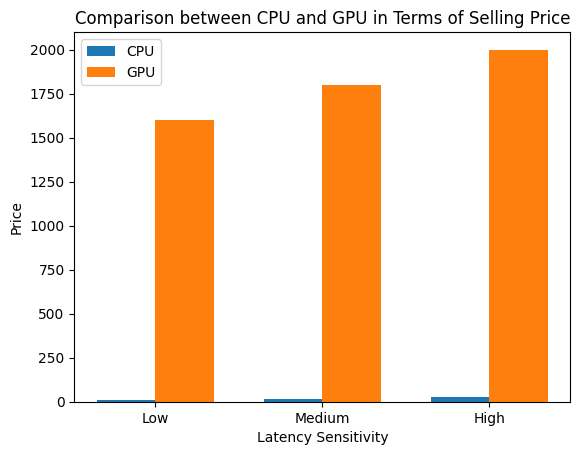

In [98]:

fig, ax = plt.subplots()


ax.bar(x - width/2, values_category1, width, label='CPU')


ax.bar(x + width/2, values_category2, width, label='GPU')


ax.set_xlabel('Latency Sensitivity')
ax.set_ylabel('Price')
ax.set_title('Comparison between CPU and GPU in Terms of Selling Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



+ High: GPU is 76 times higher than CPU
+ Medium: 116
+ Low: 152

# **Servers Exploration**

In [99]:
server = pd.read_csv("servers.csv")

In [114]:
server_CPU = server.iloc[0:4]
server_GPU = server.iloc[4:]

In [117]:
# Energy Consumption
enery_consumption_CPU_median = server_CPU["energy_consumption"].median()
enery_consumption_GPU_median = server_GPU["energy_consumption"].median()

# Purchase Price
purchase_price_CPU_median = server_CPU["purchase_price"].median()
purchase_price_GPU_median = server_GPU["purchase_price"].median()

# Slot Size
slot_size_CPU = 2
slot_size_GPU = 4

# capacity
capacity_CPU_median = server_CPU["capacity"].median()
capacity_GPU = 8

# Life Exp
life_CPU_median = server_CPU["life_expectancy"].median()
life_GPU_median = server_GPU["life_expectancy"].median()

# Maintenance Fee
maintenance_CPU_median = server_CPU["average_maintenance_fee"].median()
maintenance_GPU_median = server_GPU["average_maintenance_fee"].median()

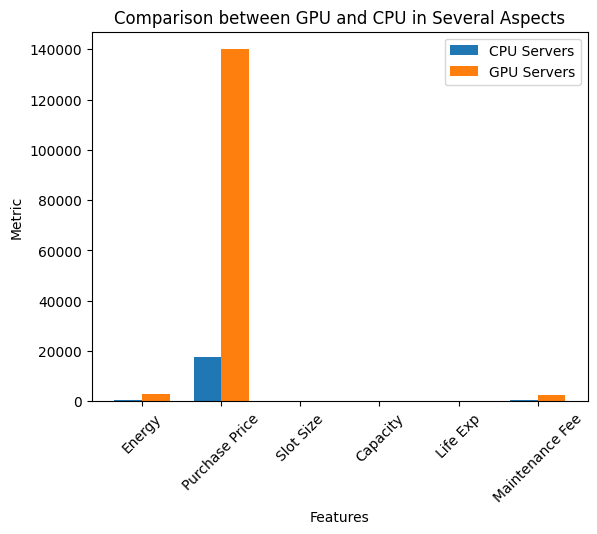

In [121]:

CPU = [enery_consumption_CPU_median,purchase_price_CPU_median,slot_size_CPU,capacity_CPU_median,
              life_CPU_median, maintenance_CPU_median]
GPU = [enery_consumption_GPU_median,purchase_price_GPU_median,slot_size_GPU,capacity_GPU,
              life_GPU_median,maintenance_GPU_median]



n = len(CPU)

x = np.arange(n)


width = 0.35

plt.bar(x, CPU, width=width, label='CPU Servers')
plt.bar(x + width, GPU, width=width, label='GPU Servers')


plt.xlabel('Features')
plt.ylabel('Metric')
plt.title('Comparison between GPU and CPU in Several Aspects')
plt.xticks(x + width / 2, ["Energy", "Purchase Price", "Slot Size", "Capacity",
                           "Life Exp", "Maintenance Fee"], rotation = 45)
plt.legend()



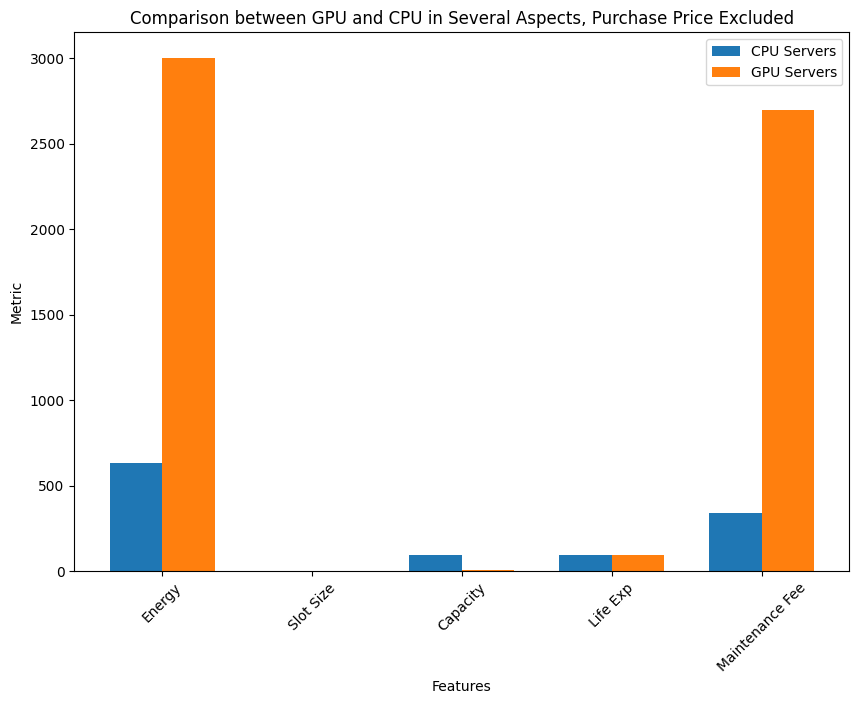

In [124]:

CPU = [enery_consumption_CPU_median,slot_size_CPU,capacity_CPU_median,
              life_CPU_median, maintenance_CPU_median]
GPU = [enery_consumption_GPU_median,slot_size_GPU,capacity_GPU,
              life_GPU_median,maintenance_GPU_median]



n = len(CPU)


x = np.arange(n)


width = 0.35
plt.figure(figsize = (10,7))

plt.bar(x, CPU, width=width, label='CPU Servers')
plt.bar(x + width, GPU, width=width, label='GPU Servers')


plt.xlabel('Features')
plt.ylabel('Metric')
plt.title('Comparison between GPU and CPU in Several Aspects, Purchase Price Excluded')
plt.xticks(x + width / 2, ["Energy", "Slot Size", "Capacity",
                           "Life Exp", "Maintenance Fee"], rotation = 45)
plt.legend()


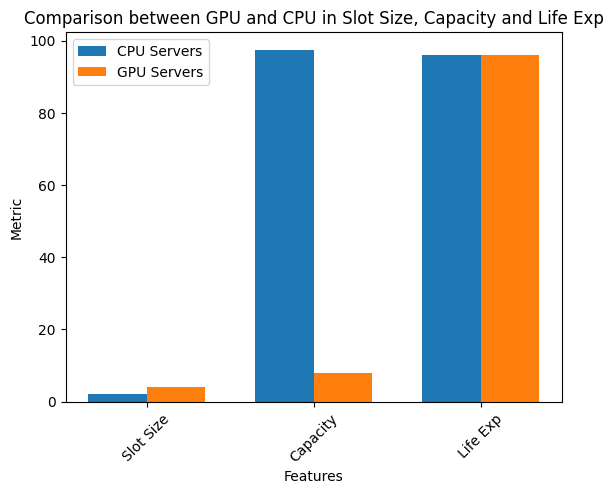

In [123]:

CPU = [slot_size_CPU,capacity_CPU_median,
              life_CPU_median]
GPU = [slot_size_GPU,capacity_GPU,
              life_GPU_median]



n = len(CPU)


x = np.arange(n)

width = 0.35


plt.bar(x, CPU, width=width, label='CPU Servers')
plt.bar(x + width, GPU, width=width, label='GPU Servers')

plt.xlabel('Features')
plt.ylabel('Metric')
plt.title('Comparison between GPU and CPU in Slot Size, Capacity and Life Exp')
plt.xticks(x + width / 2, [ "Slot Size", "Capacity",
                           "Life Exp"], rotation = 45)
plt.legend()


# **Correlation between Servers' Features**

In [132]:
server_subset = server[["purchase_price", "slots_size", "energy_consumption",
                        "capacity", "average_maintenance_fee"]]
pearson_corr = server_subset.corr(method='pearson')

In [133]:
pearson_corr

,purchase_price,slots_size,energy_consumption,capacity,average_maintenance_fee
purchase_price,1.000000,0.984068,0.986454,-0.815663,1.000000
slots_size,0.984068,1.000000,0.958405,-0.847428,0.984073
energy_consumption,0.986454,0.958405,1.000000,-0.751070,0.986451
capacity,-0.815663,-0.847428,-0.751070,1.000000,-0.815674
average_maintenance_fee,1.000000,0.984073,0.986451,-0.815674,1.000000


Text(0.5, 1.0, 'Correlation between Servers Features')

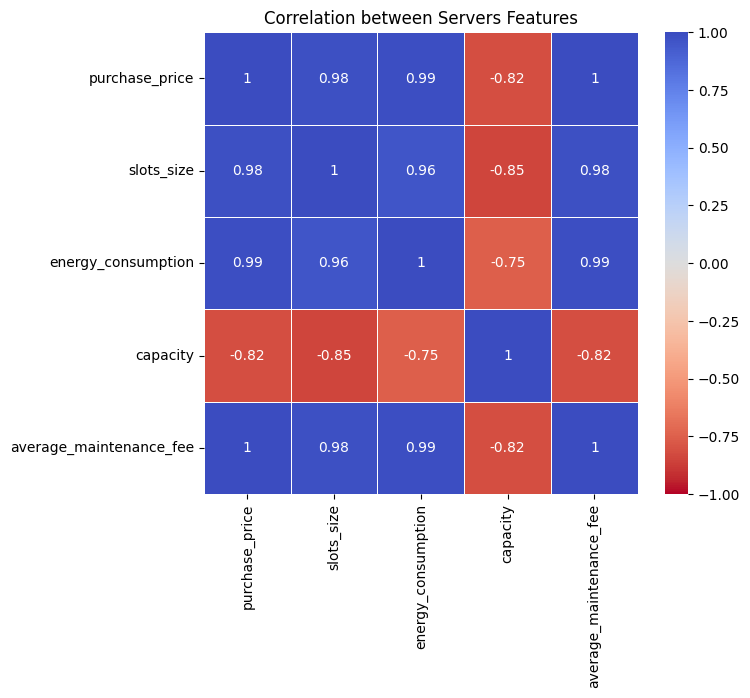

In [144]:
plt.figure(figsize=(7, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm_r', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Linear Correlation between Servers Features')



In [145]:
spearman_corr = server_subset.corr(method='spearman')

Text(0.5, 1.0, 'Non-linear Correlation between Servers Features')

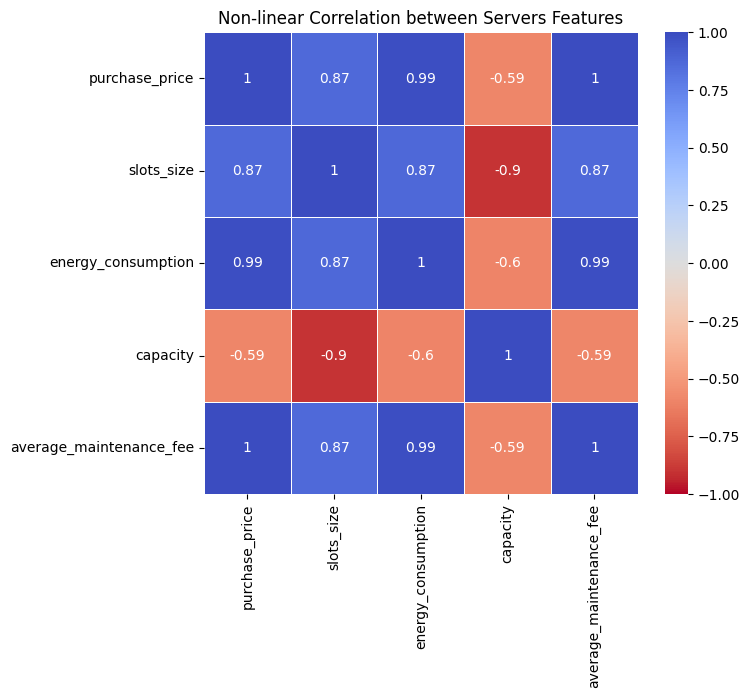

In [146]:
plt.figure(figsize=(7, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm_r', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Non-linear Correlation between Servers Features')



# **Data Centers' Features**

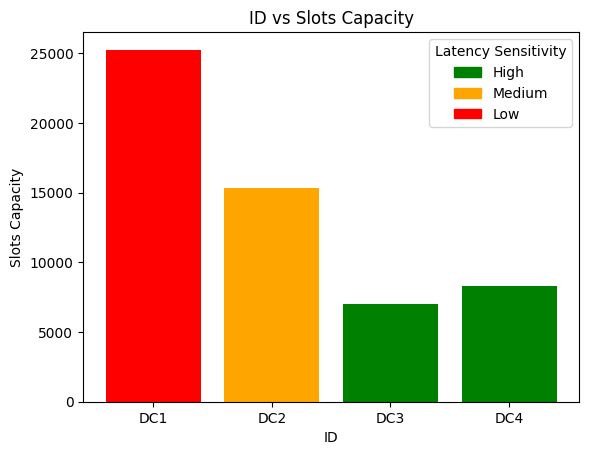

In [130]:
df = pd.read_csv("datacenters.csv")

plt.bar(df['datacenter_id'], df['slots_capacity'], color=['green' if cat == 'high' else 'orange' if cat == 'medium' else 'red' for cat in df['latency_sensitivity']])
plt.xlabel('ID')
plt.ylabel('Slots Capacity')
plt.title('ID vs Slots Capacity')

high_patch = mpatches.Patch(color='green', label='High')
medium_patch = mpatches.Patch(color='orange', label='Medium')
low_patch = mpatches.Patch(color='red', label='Low')

plt.legend(handles=[high_patch, medium_patch, low_patch], title='Latency Sensitivity')

plt.show()

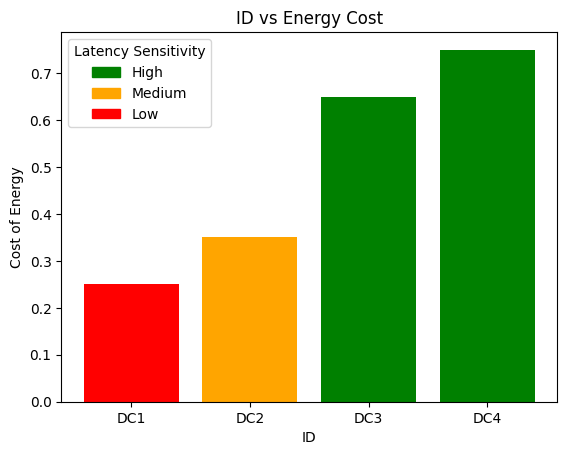

In [131]:
df = pd.read_csv("datacenters.csv")

plt.bar(df['datacenter_id'], df['cost_of_energy'], color=['green' if cat == 'high' else 'orange' if cat == 'medium' else 'red' for cat in df['latency_sensitivity']])
plt.xlabel('ID')
plt.ylabel('Cost of Energy')
plt.title('ID vs Energy Cost')

high_patch = mpatches.Patch(color='green', label='High')
medium_patch = mpatches.Patch(color='orange', label='Medium')
low_patch = mpatches.Patch(color='red', label='Low')

plt.legend(handles=[high_patch, medium_patch, low_patch], title='Latency Sensitivity')

plt.show()

In [160]:
# Correlation between Energy Cost and Slots Capacity
from scipy.stats import pearsonr, spearmanr
pearson_2,_ = pearsonr(df["cost_of_energy"].values, df["slots_capacity"].values)
spearman_2,_ = spearmanr(df["cost_of_energy"].values, df["slots_capacity"].values)

In [161]:
pearson_2

-0.9186416021912368

In [162]:
spearman_2

-0.7999999999999999